# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Institut

- Nama: Jelvin Krisna Putra
- Email: krisnaaaputraaa@gmail.com
- Id Dicoding: krisna31

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import Callback
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.ensemble import AdaBoostClassifier

print(tf.__version__)

2.15.0


## SHow all columns pandas by set option

In [3]:
pd.set_option('display.max_columns', None)

### Menyiapkan data yang akan diguankan

## Data Understanding

### Load Data From CSV File

In [4]:
student_df = pd.read_csv("student_data.csv", sep=";")

### Show 5 first data

In [5]:
student_df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preparation / Preprocessing

### Print info data

In [6]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

As you can see all the data type is correct so we don't need to change the data type

### Check describe output

In [7]:
student_df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### Check for missing value

In [8]:
student_df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


No missing value so we don't need to fill any missing value

### check every unique value and total from Status column

In [9]:
student_df["Status"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
student_df["Status"].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

### Drop data row that are enrolled because not relevant to our case

In [11]:
student_df = student_df[student_df["Status"] != "Enrolled"]

### Count after drop data

In [12]:
student_df["Status"].value_counts()

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

### Change the column name to is_graduate and value 0 and 1

In [13]:
student_df = student_df.rename(columns={'Status': 'Graduated'})

student_df["Graduated"] = student_df['Graduated'].map({'Graduate': 1, 'Dropout': 0})

student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Graduated
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Check corelate each column

In [14]:
corr = student_df.corr()['Graduated'].sort_values(ascending=False)

corr

Graduated                                       1.000000
Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Application_order                               0.094355
Daytime_evening_attendance                      0.084496
Curricular_units_1st_sem_evaluations            0.059786
Curricular_units_2nd_sem_credited               0.052402
GDP                            

#### I set the correlation threshold is ±0.2

In [15]:
chosen_corr = corr[(corr > 0.2) | (corr < -0.2)]
chosen_corr

Graduated                            1.000000
Curricular_units_2nd_sem_approved    0.653995
Curricular_units_2nd_sem_grade       0.605350
Curricular_units_1st_sem_approved    0.554881
Curricular_units_1st_sem_grade       0.519927
Tuition_fees_up_to_date              0.442138
Scholarship_holder                   0.313018
Application_mode                    -0.244507
Gender                              -0.251955
Debtor                              -0.267207
Age_at_enrollment                   -0.267229
Name: Graduated, dtype: float64

Above are the feature column I use for the model

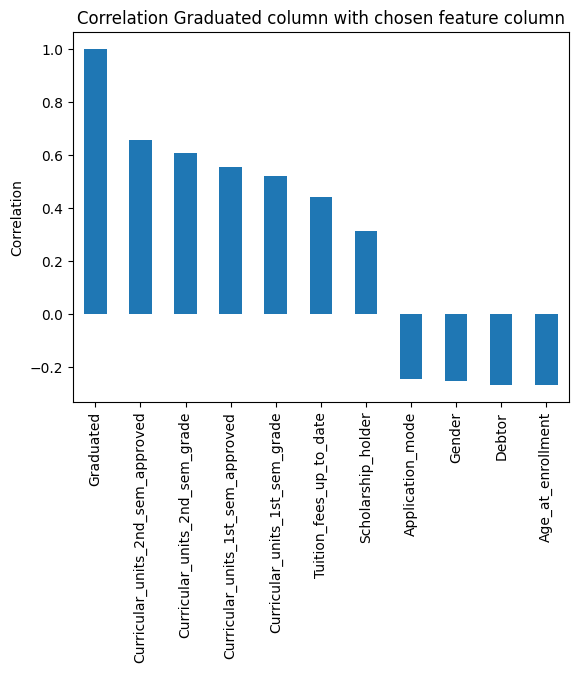

In [16]:
chosen_corr.plot(kind='bar')
plt.title('Correlation Graduated column with chosen feature column')
plt.ylabel('Correlation')
plt.show()

### oversampling for target "dropout" so overcome bias


In [17]:
student_df["Graduated"].value_counts()

Graduated
1    2209
0    1421
Name: count, dtype: int64

In [18]:
df_majority_1 = student_df[(student_df.Graduated == 1)]
df_minority = student_df[(student_df.Graduated == 0)]

df_minority_undersampled = resample(df_minority, n_samples=2209, random_state=42)


student_df = pd.concat([df_majority_1, df_minority_undersampled]).reset_index(drop=True)
student_df = shuffle(student_df, random_state=42)
student_df.reset_index(drop=True, inplace=True)

student_df["Graduated"].value_counts()

Graduated
1    2209
0    2209
Name: count, dtype: int64

## Modeling

### Determine the feature and label column

In [19]:
feature_column = [
  'Curricular_units_2nd_sem_approved',
  'Curricular_units_1st_sem_approved',
  'Curricular_units_2nd_sem_grade',
  'Curricular_units_1st_sem_grade',
  'Tuition_fees_up_to_date',
  'Scholarship_holder',
  'Application_mode',
  'Gender',
  'Debtor',
  'Age_at_enrollment'
]

label_column = "Graduated"

### Create scaling function for the numerical feature

In [20]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

### Split the data to be train and test

In [21]:
X = student_df[feature_column]
y = student_df[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, shuffle=True)

print(X_train.shape , " : ", X_test.shape)

(3534, 10)  :  (884, 10)


### Scaling the numerical feature column with scaling function created before

In [22]:
X_train, X_test = scaling(feature_column, X_train, X_test)

print(X_train.shape , " : ", X_test.shape)

(3534, 10)  :  (884, 10)


### Using grid search to search best params to be use in LogisticRegression Algorithm

In [23]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.001, 0.01, 0.1, 1, 10]
}

log_model = LogisticRegression(random_state=88)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(X_train, y_train)

best_params_lr = CV_lr.best_params_
best_model_lr = LogisticRegression(**best_params_lr, random_state=88)
best_model_lr.fit(X_train, y_train)

y_pred_lr = best_model_lr.predict(X_test)

report_lr = classification_report(y_test, y_pred_lr)
print(f'Logistic Regression Classification Report:\n{report_lr}')

model_filename = f'model/y_pred_lr.joblib'
joblib.dump(best_model_lr, model_filename)
print(f'Logistic Regression model saved to {model_filename}')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       442
           1       0.84      0.89      0.87       442

    accuracy                           0.86       884
   macro avg       0.86      0.86      0.86       884
weighted avg       0.86      0.86      0.86       884

Logistic Regression model saved to model/y_pred_lr.joblib


c:\Users\krisna\.conda\envs\jaya-jaya-maju-dropout\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\krisna\.conda\envs\jaya-jaya-maju-dropout\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\krisna\.conda\envs\jaya-jaya-maju-dropout\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\krisna\.conda\envs\jaya-jaya-maju-dropout\lib

### Using grid search to search best params to be use in Random Forest Classifier Algorithm

In [24]:
param_grid_rf = {
    "n_estimators": [50, 88],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5, 8],
    "min_samples_leaf": [1, 2],
}

rf_model = RandomForestClassifier(random_state=88)
CV_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1)
CV_rf.fit(X_train, y_train)

best_params_rf = CV_rf.best_params_
best_model_rf = RandomForestClassifier(**best_params_rf, random_state=88)
best_model_rf.fit(X_train, y_train)

y_pred_rf = best_model_rf.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf)
print(f'RandomForestClassifier Classification Report:\n{report_rf}')

model_filename_rf = f'model/model_rf.joblib'
joblib.dump(best_model_rf, model_filename_rf)
print(f'Random Forest model saved to {model_filename_rf}')

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       442
           1       0.95      0.94      0.95       442

    accuracy                           0.95       884
   macro avg       0.95      0.95      0.95       884
weighted avg       0.95      0.95      0.95       884

Random Forest model saved to model/model_rf.joblib


### Using grid search to search best params to be use in Ada Boost Algorithm

In [25]:
param_grid_adaboost = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 1],
}

adaboost_model = AdaBoostClassifier(random_state=88)
CV_adaboost = GridSearchCV(estimator=adaboost_model, param_grid=param_grid_adaboost, cv=5, n_jobs=-1)
CV_adaboost.fit(X_train, y_train)

best_params_adaboost = CV_adaboost.best_params_
best_model_adaboost = AdaBoostClassifier(**best_params_adaboost, random_state=88)
best_model_adaboost.fit(X_train, y_train)

y_pred_adaboost = best_model_adaboost.predict(X_test)

report_adaboost = classification_report(y_test, y_pred_adaboost)
print(f'AdaBoostClassifier Classification Report:\n{report_adaboost}')

model_filename_adaboost = f'model/model_adaboost.joblib'
joblib.dump(best_model_adaboost, model_filename_adaboost)
print(f'AdaBoost model saved to {model_filename_adaboost}')

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       442
           1       0.85      0.92      0.88       442

    accuracy                           0.88       884
   macro avg       0.88      0.88      0.88       884
weighted avg       0.88      0.88      0.88       884

AdaBoost model saved to model/model_adaboost.joblib


### Also experiment using Neural Network Algorithm

#### Create Custom Callback so train can stop if var accuray > 0.95

In [26]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > 0.95:
            print("\nValidation Accuracy above 0.88. Stopping training.")
            self.model.stop_training = True

#### Create and train the model

In [27]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # sigmoid for binary prediction
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=88, batch_size=32, validation_split=0.2, callbacks=[CustomCallback()])
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

report_nn = classification_report(y_test, y_pred_nn)
print(f'Neural Network Classification Report:\n{report_nn}')

model_filename_nn = 'model/neural_network_model.h5'
nn_model.save(model_filename_nn)
print(f'Neural Network model saved to {model_filename_nn}')



Epoch 1/88


89/89 [==============================] - 2s 6ms/step - loss: 0.5378 - accuracy: 0.7623 - val_loss: 0.4157 - val_accuracy: 0.8317
Epoch 2/88
89/89 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.8391 - val_loss: 0.3596 - val_accuracy: 0.8501
Epoch 3/88
89/89 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8532 - val_loss: 0.3451 - val_accuracy: 0.8656
Epoch 4/88
89/89 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.8663 - val_loss: 0.3398 - val_accuracy: 0.8656
Epoch 5/88
89/89 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8748 - val_loss: 0.3342 - val_accuracy: 0.8699
Epoch 6/88
89/89 [==============================] - 0s 3ms/step - loss: 0.3377 - accuracy: 0.8727 - val_loss: 0.3316 - val_accuracy: 0.8628
Epoch 7/88
89/89 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8716 - val_loss: 0.3294 - val_accuracy: 0.8713
Epoch 8/88
89/89

c:\Users\krisna\.conda\envs\jaya-jaya-maju-dropout\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

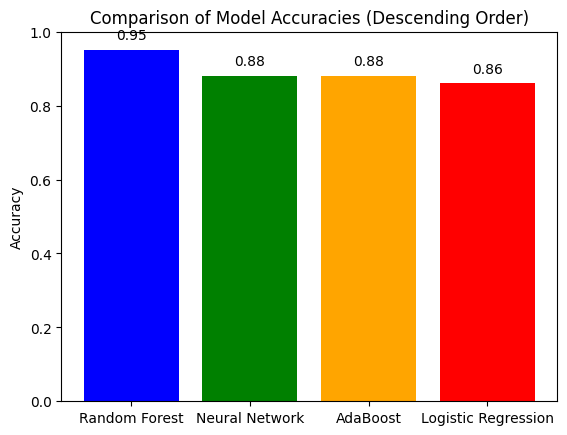

In [28]:
reports = [report_lr, report_rf, report_adaboost, report_nn]
models = ['Logistic Regression', 'Random Forest', 'AdaBoost', 'Neural Network']

accuracy_scores = [float(report.split()[-2]) for report in reports]

sorted_indices = np.argsort(accuracy_scores)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracy_scores = [accuracy_scores[i] for i in sorted_indices]

plt.bar(sorted_models, sorted_accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Descending Order)')

for i, v in enumerate(sorted_accuracy_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

plt.show()